# Setup

In [21]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn import datasets

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Import Data

In [22]:
# Load Breast Cancer dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
breast_cancer = datasets.load_breast_cancer()
variable_names = breast_cancer.feature_names

In [23]:
# Convert dataset into Pandas DataFrame
breast_cancer.df = pd.DataFrame(breast_cancer.data)
breast_cancer.df.columns = variable_names

y_target = pd.DataFrame(breast_cancer.target)

In [24]:
# Examine dataset
breast_cancer.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [25]:
breast_cancer.df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [26]:
# Check out a few rows
breast_cancer.df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
y_target.shape

(569, 1)

Text(0.5,1,u'Ground Truth Classification')

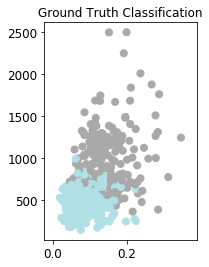

In [28]:
# Plot may not be entirely useful given so many features & can't tell easily which is positive / negative result. 
color_theme = np.array(['darkgray', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=breast_cancer.df['mean compactness'], y=breast_cancer.df['mean area'], c=color_theme[breast_cancer.target], s=50)
plt.title('Ground Truth Classification')

### Create Test Set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.df, y_target, test_size=0.33, random_state=42)

In [30]:
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


In [31]:
print(len(X_train), "train +", len(X_test), "test")

381 train + 188 test


In [32]:
print(len(y_train), "train +", len(y_test), "test")

381 train + 188 test


# Discover and Visualize the Data to Gain Insights

In [33]:
# Create a copy of training set for playing around with
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

In [34]:
corr_matrix = breast_cancer_data_copy.corr()

In [35]:
# Concatenate data and target dataframes
breast_cancer_data_copy = pd.concat([X_train_copy, y_train_copy], axis=1, sort=False)
breast_cancer_data_copy.shape

(381, 31)

In [36]:
breast_cancer_data_copy.rename(columns={0: 'classification'}, inplace=True)
breast_cancer_data_copy.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,classification
172,15.46,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.07069,...,17.04,125.00,1102.0,0.15310,0.3583,0.5830,0.18270,0.3216,0.10100,0
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,27.01,91.63,645.8,0.09402,0.1936,0.1838,0.05601,0.2488,0.08151,1
56,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,...,28.14,170.10,2145.0,0.16240,0.3511,0.3879,0.20910,0.3537,0.08294,0
497,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,24.34,92.82,607.3,0.12760,0.2506,0.2028,0.10530,0.3035,0.07661,1
301,12.46,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,0.06249,...,23.07,88.13,551.3,0.10500,0.2158,0.1904,0.07625,0.2685,0.07764,1


In [37]:
# View correlation between the data
breast_cancer_data_copy.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,classification
mean radius,1.000000,0.305721,0.997875,0.986699,0.142021,0.458967,0.656871,0.814270,0.162164,-0.361503,...,0.287404,0.963933,0.941416,0.092236,0.362484,0.516692,0.720924,0.178980,-0.054193,-0.716526
mean texture,0.305721,1.000000,0.312986,0.297701,0.012366,0.245874,0.302411,0.303572,0.113142,-0.073093,...,0.909187,0.348647,0.323705,0.087186,0.279776,0.294055,0.313836,0.108260,0.079969,-0.406273
mean perimeter,0.997875,0.312986,1.000000,0.986226,0.179081,0.510735,0.697020,0.843394,0.195972,-0.313602,...,0.294542,0.969345,0.942233,0.123223,0.405840,0.555094,0.749359,0.199561,-0.010585,-0.730633
mean area,0.986699,0.297701,0.986226,1.000000,0.154096,0.454335,0.668111,0.815105,0.162676,-0.327649,...,0.271706,0.955676,0.958863,0.100407,0.340875,0.501532,0.697273,0.150645,-0.052865,-0.689973
mean smoothness,0.142021,0.012366,0.179081,0.154096,1.000000,0.671287,0.523907,0.545416,0.536621,0.582539,...,0.071130,0.216502,0.188257,0.799745,0.487003,0.459200,0.504681,0.364502,0.519618,-0.358537
mean compactness,0.458967,0.245874,0.510735,0.454335,0.671287,1.000000,0.872380,0.813980,0.618402,0.561143,...,0.260779,0.549024,0.468706,0.571712,0.861658,0.829265,0.808194,0.485049,0.680960,-0.589056
mean concavity,0.656871,0.302411,0.697020,0.668111,0.523907,0.872380,1.000000,0.919637,0.519177,0.319234,...,0.303249,0.710342,0.658794,0.443604,0.730650,0.886438,0.851232,0.387546,0.492507,-0.698948
mean concave points,0.814270,0.303572,0.843394,0.815105,0.545416,0.813980,0.919637,1.000000,0.480654,0.130075,...,0.310369,0.851013,0.804849,0.449304,0.645188,0.766298,0.908584,0.380461,0.336425,-0.786887
mean symmetry,0.162164,0.113142,0.195972,0.162676,0.536621,0.618402,0.519177,0.480654,1.000000,0.456296,...,0.139831,0.230757,0.185097,0.413827,0.499329,0.470318,0.471357,0.679279,0.457276,-0.352500
mean fractal dimension,-0.361503,-0.073093,-0.313602,-0.327649,0.582539,0.561143,0.319234,0.130075,0.456296,1.000000,...,-0.051128,-0.256435,-0.277324,0.500557,0.455319,0.340063,0.155883,0.278061,0.783522,0.038080


In [38]:
# Lets check corrleation to target
corr_matrix["classification"].sort_values(ascending=False)

classification             1.000000
smoothness error           0.058270
mean fractal dimension     0.038080
texture error             -0.011044
symmetry error            -0.033142
fractal dimension error   -0.056691
concavity error           -0.253469
compactness error         -0.279540
worst fractal dimension   -0.293110
mean symmetry             -0.352500
mean smoothness           -0.358537
concave points error      -0.396448
mean texture              -0.406273
worst smoothness          -0.411462
worst symmetry            -0.443139
worst texture             -0.460889
area error                -0.507911
perimeter error           -0.526579
radius error              -0.538973
mean compactness          -0.589056
worst compactness         -0.593237
worst concavity           -0.686320
mean area                 -0.689973
mean concavity            -0.698948
worst area                -0.715056
mean radius               -0.716526
mean perimeter            -0.730633
worst radius              -0

# Training a Binary Classifier

In [39]:
# Good place to start is with a Stochastic Gradient Descent (SGD) classifier
from sklearn.linear_model import SGDClassifier

In [40]:
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train)

/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

# Performance Measures


### Measuring Accuracy Using Cross-Validation

In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.890625  , 0.85826772, 0.88888889])

NOTE: ACCURACY is generally not the preferred performance measure for classifiers, especially when especially when you are dealing with skewed datasets

### Confusion Matrix

In [42]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [43]:
# Each row in a confusion matrix represents an actual class, while each column represents a predicted class
# In this example, the first row consisders benign (0s), 108 were correctly classified as benign (0s) (true negatives)
# While the remaining 37 were wrongly classified as malignant (1s) (false positives)
# The second row considers results, 9 were wrongly classified as benign (false negatives),
# While the remaining 227 were correctly classified as malignant (true positives)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[108,  37],
       [  9, 227]])

TP = true positives; FP = false positives; FN = false negatives

Precision  = TP / (TP + FP)
"Ratio of true positives (TP) amongst the real values"

Recall = TP / (TP + FN)
"Ratio of true positives (TP) amonst the predicted values"

### Precision and Recall

In [44]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred) # == 227 / (227 + 37)

0.8598484848484849

In [45]:
recall_score(y_train, y_train_pred) # 227 / (227 + 9)

0.961864406779661

In [46]:
# F1 score is the harmonic mean of precision and recall. Whereas the regular mean treats all values equally, the
# harmonic mean gives much more weight to low values. As a result, the clasifier will only get a high F1 score if
# both recall and precision are high
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.908

In [61]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,
                             method="decision_function")

In [62]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [63]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

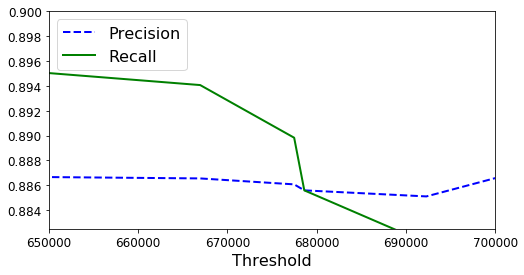

In [58]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([.8825, .9])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([650000, 700000])
plt.show()

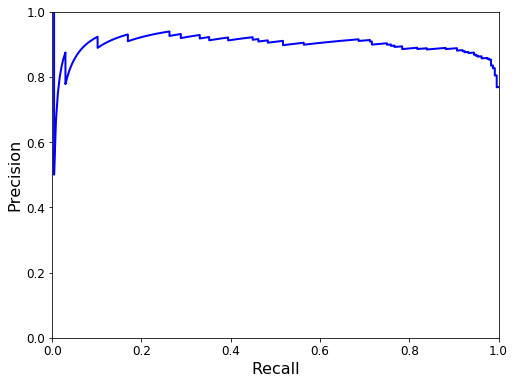

In [143]:
# One way to select a good precision/recall tradeoff is to plot precision directly against recall
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### ROC Curve

In [64]:
# The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers
# THE ROC curve plots the true positive rate (recall) against the false positive rate
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

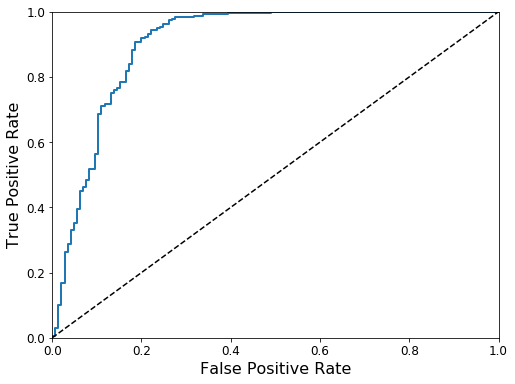

In [65]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

Dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (towards the top-left corner)

In [66]:
# One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a 
# ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.9043249561659847

You should prefer the precision/recall (or PR) curve whenever the positiive class is rare OR when you care more about false positiives than the false negatives, and the ROC curve otherwise.

# Training a Random Forest

In [88]:
# Note: we set n_estimators=10 to avoid a warning about the fact that 
# its default value will be set to 100 in Scikit-Learn 0.22.
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3,
                                    method="predict_proba")

In [89]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

### Precision vs. Recall Curve

In [90]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_forest)

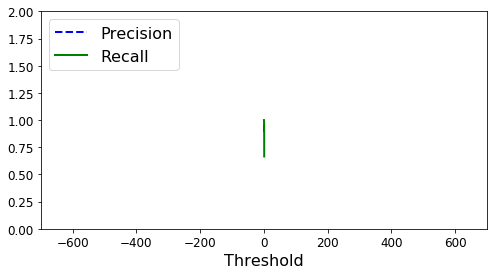

In [94]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 2])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700, 700])
plt.show()

In [92]:
# Better precision and recall scores as well
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3)
precision_score(y_train, y_train_pred_forest)

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


0.9612068965517241

In [82]:
thresholds

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [83]:
precisions

array([0.89056604, 0.90384615, 0.94354839, 0.95473251, 0.9612069 ,
       0.96428571, 0.97663551, 0.98492462, 0.98125   , 1.        ])

In [84]:
recalls

array([1.        , 0.99576271, 0.99152542, 0.98305085, 0.94491525,
       0.91525424, 0.88559322, 0.83050847, 0.66525424, 0.        ])

### ROC Curve

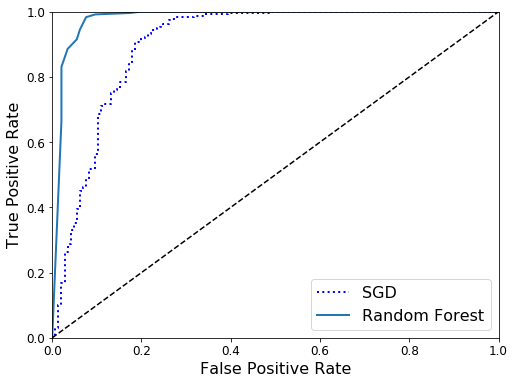

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()
# Notice it's much closer to the top-left corner, and as a result the AUC is much better

In [73]:
roc_auc_score(y_train, y_scores_forest)

0.9803915838690824